In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bottle.csv to bottle.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dataset=pd.read_csv("bottle.csv")
dataset.shape

<ipython-input-2-e60d35e7c700>:7: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("bottle.csv")


(864863, 74)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
df=dataset[['T_degC','Salnty']]
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [ ]:
df.isna().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

<ipython-input-6-51e2c94c543c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


In [ ]:
df.shape

(814247, 2)

In [ ]:
df.describe()

,T_degC,Salnty
count,814247.000000,814247.000000
mean,10.860287,33.841337
std,4.224930,0.461636
min,1.440000,28.431000
25%,7.750000,33.489000
50%,10.110000,33.866000
75%,13.930000,34.197000
max,31.140000,37.034000


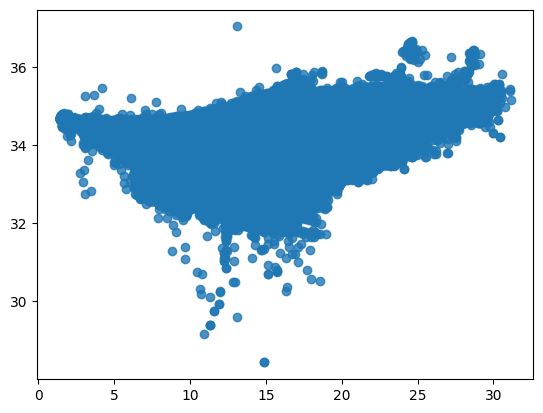

In [ ]:
plt.scatter(x=df['T_degC'],y=df['Salnty'],alpha=0.8)

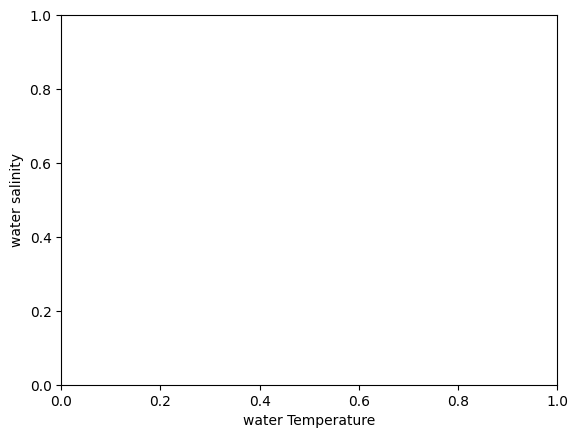

In [ ]:
plt.xlabel("water Temperature")
plt.ylabel("water salinity")
plt.show()

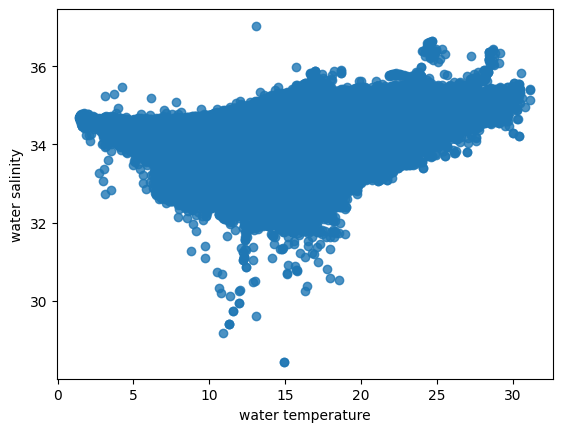

In [ ]:
plt.scatter(x=df['T_degC'],y=df['Salnty'],alpha=0.8)
plt.xlabel("water temperature")
plt.ylabel("water salinity")
plt.show()

In [ ]:
x=df['T_degC']
y=df['Salnty']

In [ ]:
x=df['T_degC']
y=df['Salnty']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10,shuffle=True)

In [ ]:
x_train.shape

(569972,)

In [ ]:
regressor=LinearRegression()
regressor.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [ ]:
m=regressor.coef_
b=regressor.intercept_
b,m

(array([34.44056898]), array([[-0.05521248]]))

In [ ]:
y_pred=regressor.predict(np.array(x_test).reshape(-1,1))
r2_score(y_test,y_pred)

0.2550610237252303

In [ ]:
x_input=np.linspace(0,30,500)
y_input=m*x_input+b
y_input=y_input.reshape(-1,1)

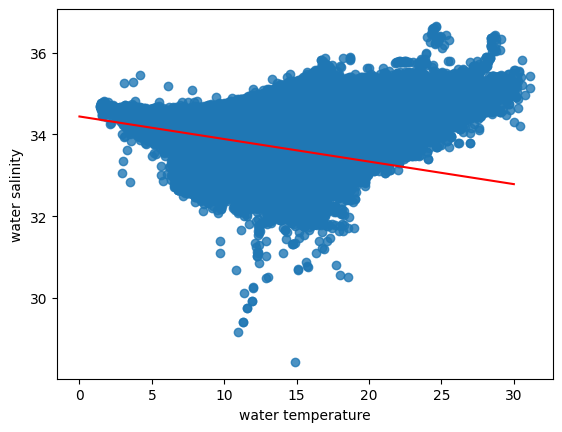

In [ ]:
plt.scatter(x=x_train,y=y_train,alpha=0.8)
plt.plot(x_input,y_input,c='r')
plt.xlabel('water temperature')
plt.ylabel('water salinity')
plt.show()

In [ ]:
class LinearRegressionFromScratch:
  def __init__(self):
    self.m=None
    self.b=None
  def fit(self,x_train,y_train):
    num=0
    den=0
    x_mean=x_train.mean()
    y_mean=y_train.mean()
    for i in range(x_train.shape[0]):
      num=num+((x_train.iloc[i]-x_mean)*(y_train.iloc[i]-y_mean))
      den=den+((x_train.iloc[i]-x_mean)*(x_train.iloc[i]-x_mean))
    self.m=num/den
    self.b=y_mean-(self.m*x_mean)
    return self.m,self.b
  def predict(self, x_test):
    y_pred=[]
    for i in range(x_test.shape[0]):
      y_pred.append(self.m*x_test.iloc[i]+self.b)
    return y_pred
regressor=LinearRegressionFromScratch()
m,b=regressor.fit(x_train,y_train)
print(m)


-0.05521248314423641


In [ ]:
print(b)

34.44056897690817


In [ ]:
y_pred=regressor.predict(x_test)
x_input=np.linspace(0,30,500)
y_input=m*x_input+b

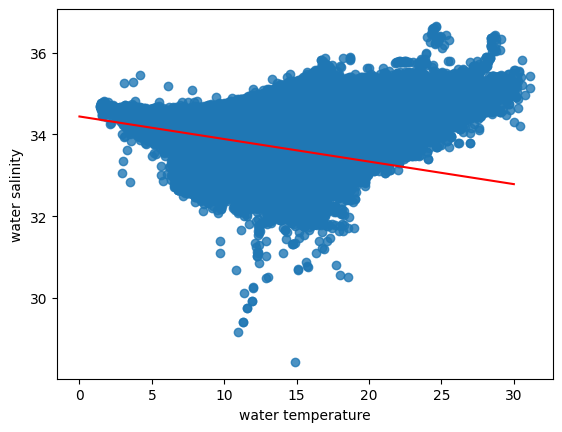

In [ ]:
plt.scatter(x=x_train,y=y_train,alpha=0.8)
plt.plot(x_input,y_input,c='r')
plt.xlabel("water temperature")
plt.ylabel("water salinity")
plt.show()

# New Section